#**DATA PREPARATION**

In [ ]:
!pip install pandas seaborn statsmodels


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import levene


import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.regression.linear_model import GLS

**Membaca Datasets**

Mengimpor data mentah untuk analisis lebih lanjut.

In [4]:
# Membaca dataset
data = pd.read_csv("marvel_box_office.csv")

**Membersihkan Data**

Menjamin bahwa dataset tidak memiliki missing values di kolom-kolom penting tersebut, sehingga analisis lebih lanjut tidak terpengaruh oleh data yang tidak lengkap.

In [5]:
# Membersihkan data
# Pastikan kolom-kolom utama tidak ada data yang hilang atau tidak konsisten
data = data.dropna(subset=["Meta Score", "Tomatometer"])

**Menampilkan Informasi Dasar tentang Dataset**



1.   Memastikan bahwa dataset telah diimpor dan dibersihkan dengan benar

2.   Memberikan gambaran umum tentang struktur dan isi dataset, termasuk tipe data dan kelengkapan data

3.   Membantu mengidentifikasi potensi masalah dalam dataset, seperti tipe data yang tidak sesuai atau nilai hilang yang mungkin masih ada.




In [6]:
# Tampilkan informasi dasar tentang dataset
print("Informasi dataset:")
print(data.info())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Movie                               68 non-null     object 
 1   Release Date                        68 non-null     object 
 2   Release Month                       68 non-null     object 
 3   Release Day                         68 non-null     int64  
 4   Release Year                        68 non-null     int64  
 5   Ownership                           68 non-null     object 
 6   Domestic Box Office                 68 non-null     int64  
 7   Inflation Adjusted Domestic         68 non-null     int64  
 8   International Box Office            68 non-null     int64  
 9   Inflation Adjusted International    68 non-null     int64  
 10  Worldwide Box Office                68 non-null     int64  
 11  Inflation Adjusted Worldwide

**Name** - Nama filmnya.

**Release Date** - Kapan film dirilis di bioskop.

**Ownership** - Siapa yang membuat film tersebut.

**Domestic Box Office** - Pendapatan di AS.

**Inflation Adjusted Domestic** - Pendapatan box office domestik disesuaikan dengan tingkat inflasi saat ini.

**International Box Office** - Pendapatan di mana pun kecuali AS.

**Inflation Adjusted International** - Pendapatan box office internasional disesuaikan dengan tingkat inflasi saat ini.

**Worldwide Box Office** - Pendapatan total, domestik + internasional.

**Inflation Adjusted Worldwide** - Pendapatan box office di seluruh dunia disesuaikan dengan tingkat inflasi saat ini.

**Opening Weekend** - Pendapatan setelah akhir pekan pertama dirilis.

**Inflation Adjusted Opening Weekend** - Pendapatan pembukaan akhir pekan disesuaikan dengan tingkat inflasi saat ini.

**Budget** - Berapa banyak uang yang dialokasikan untuk membuat film tersebut.

**Inflation Adjusted Budget** - Anggaran disesuaikan dengan tingkat inflasi saat ini.

**IMDb Score** - Berapa skor film tersebut di IMDb.

**Meta Score** - Berapa Meta Score di IMDb.

**Tomatometer** - Skor dari Rotten Tomatoes. (Jumlah ulasan positif dari
kritikus profesional).

**Rotten Tomato Audience Score** - Bagaimana penonton dari Rotten Tomatoes menilai film tersebut.

**Run Time in Minutes** - Berapa lama film dalam hitungan menit.

**Phase** - Di fase MCU mana film tersebut berada.

**Director** - Sutradara film.

#**DATA EXPLORATION**

In [9]:
# Membuat kategori berdasarkan kuantil
data['Tomatometer Category'], bin_edges = pd.qcut(data['Tomatometer'], q=4, labels=['Buruk', 'Cukup', 'Menengah', 'Bagus'], retbins=True)

# Menampilkan distribusi kategori
print(data['Tomatometer Category'].value_counts())

Tomatometer Category
Buruk       17
Cukup       17
Menengah    17
Bagus       17
Name: count, dtype: int64


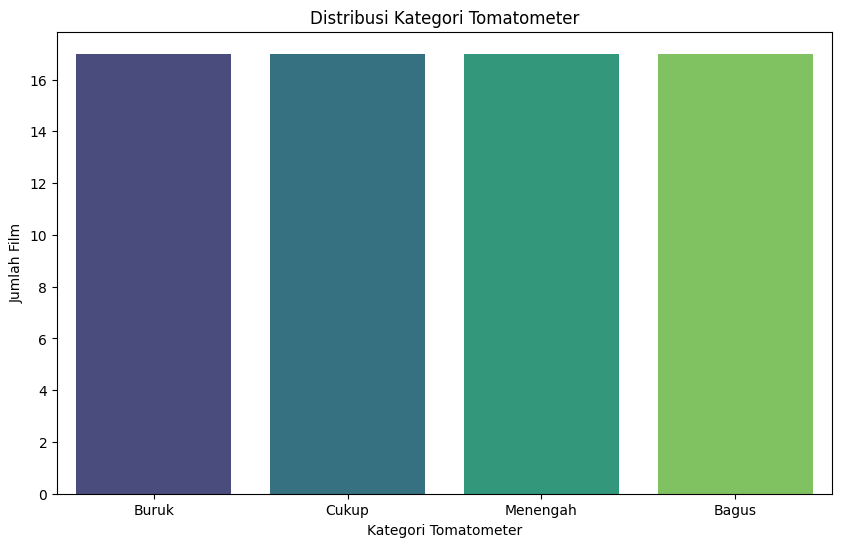

In [10]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Tomatometer Category', palette='viridis')
plt.title('Distribusi Kategori Tomatometer')
plt.xlabel('Kategori Tomatometer')
plt.ylabel('Jumlah Film')
plt.show()

In [11]:
# Menghitung total Tomatometer berdasarkan kategori
total_tomatometer_by_category = data.groupby('Tomatometer Category')['Tomatometer'].sum()

# Menampilkan total Tomatometer berdasarkan kategori
print(total_tomatometer_by_category)

Tomatometer Category
Buruk        456
Cukup       1046
Menengah    1397
Bagus       1562
Name: Tomatometer, dtype: int64


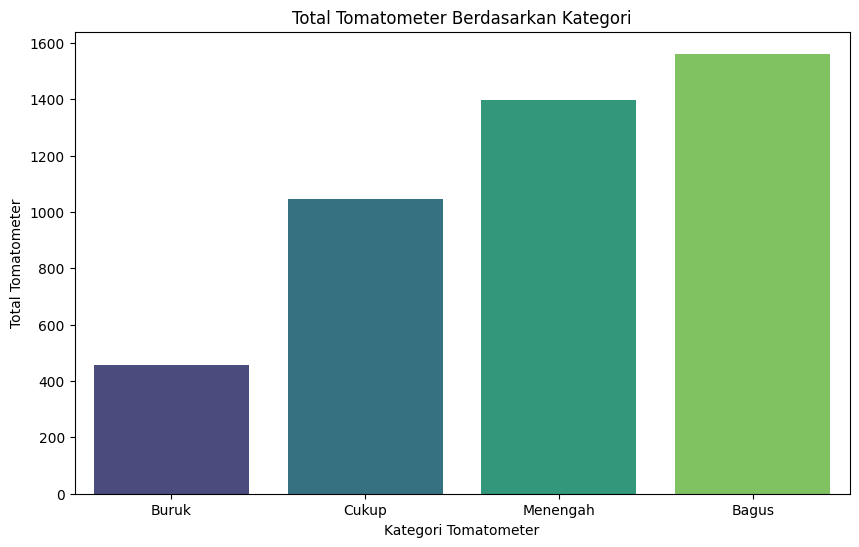

In [12]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=total_tomatometer_by_category.index, y=total_tomatometer_by_category.values, palette='viridis')
plt.title('Total Tomatometer Berdasarkan Kategori')
plt.xlabel('Kategori Tomatometer')
plt.ylabel('Total Tomatometer')
plt.show()

In [ ]:
# Menampilkan bin edges
print("Bin Edges:", bin_edges)

# Menampilkan kategori beserta rentang nilainya
categories = ['Buruk', 'Cukup', 'Menengah', 'Bagus']
for i in range(len(bin_edges) - 1):
    print(f"{categories[i]}: {bin_edges[i]} - {bin_edges[i + 1]}")

Bin Edges: [ 9.   46.75 74.5  87.5  96.  ]
Buruk: 9.0 - 46.75
Cukup: 46.75 - 74.5
Menengah: 74.5 - 87.5
Bagus: 87.5 - 96.0


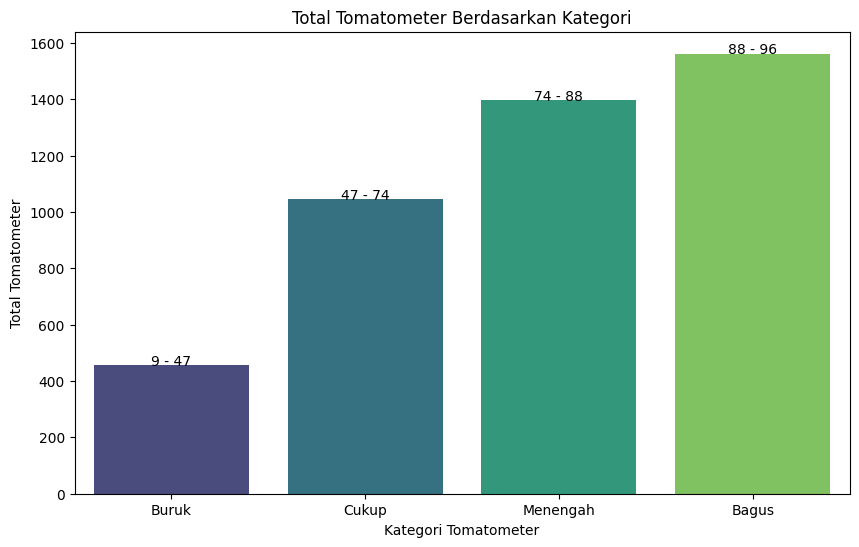

In [ ]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=total_tomatometer_by_category.index, y=total_tomatometer_by_category.values, palette='viridis')
plt.title('Total Tomatometer Berdasarkan Kategori')
plt.xlabel('Kategori Tomatometer')
plt.ylabel('Total Tomatometer')

# Menambahkan teks untuk menampilkan rentang nilai pada sumbu x
for i in range(len(bin_edges) - 1):
    plt.text(i, total_tomatometer_by_category.values[i], f"{bin_edges[i]:,.0f} - {bin_edges[i+1]:,.0f}", ha='center')

plt.show()

In [13]:
# Membuat kategori berdasarkan kuantil
data['MetaScore Category'], bin_edges = pd.qcut(data['Meta Score'], q=4, labels=['Buruk', 'Cukup', 'Menengah', 'Bagus'], retbins=True)

# Menampilkan distribusi kategori
print(data['MetaScore Category'].value_counts())

MetaScore Category
Menengah    18
Buruk       17
Cukup       17
Bagus       16
Name: count, dtype: int64


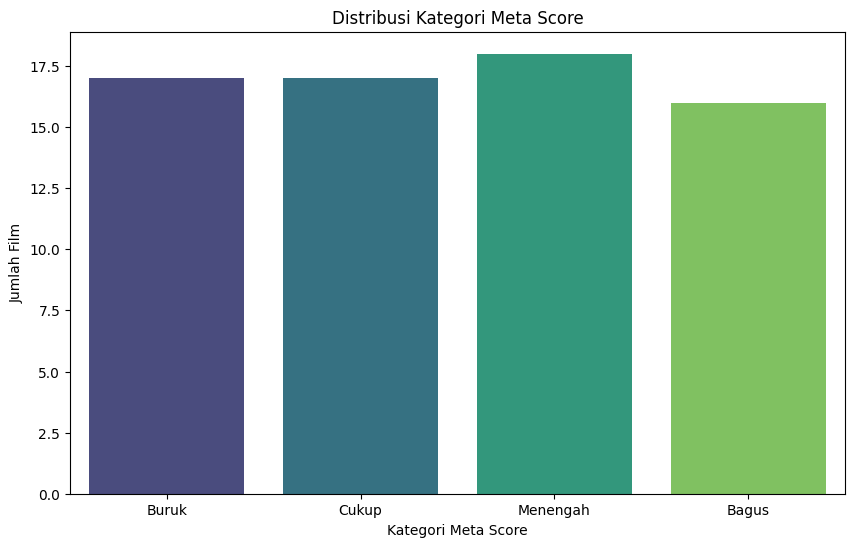

In [14]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MetaScore Category', palette='viridis')
plt.title('Distribusi Kategori Meta Score')
plt.xlabel('Kategori Meta Score')
plt.ylabel('Jumlah Film')
plt.show()

In [15]:
# Menghitung total Meta Score berdasarkan kategori
total_metaScore_by_category = data.groupby('MetaScore Category')['Meta Score'].sum()

# Menampilkan total Meta Score berdasarkan kategori
print(total_metaScore_by_category)

MetaScore Category
Buruk        627
Cukup        934
Menengah    1188
Bagus       1205
Name: Meta Score, dtype: int64


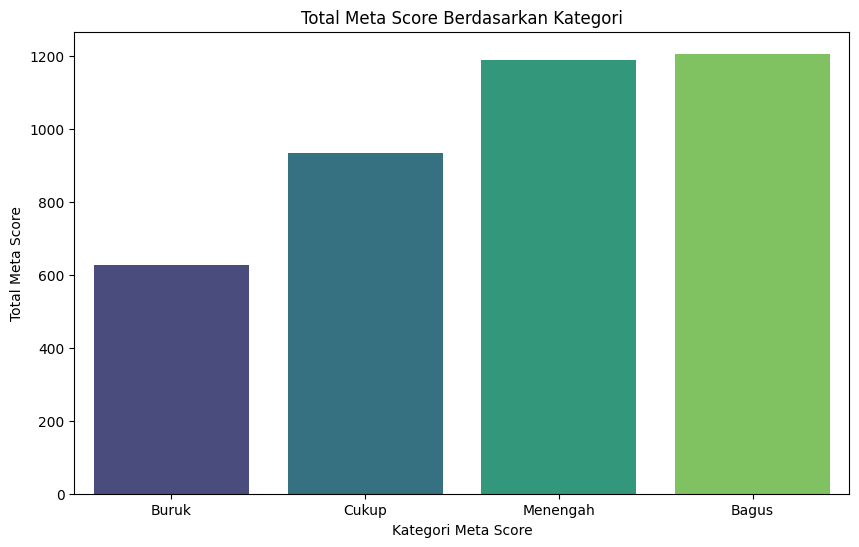

In [16]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=total_metaScore_by_category.index, y=total_metaScore_by_category.values, palette='viridis')
plt.title('Total Meta Score Berdasarkan Kategori')
plt.xlabel('Kategori Meta Score')
plt.ylabel('Total Meta Score')
plt.show()

In [17]:
# Menampilkan bin edges
print("Bin Edges:", bin_edges)

# Menampilkan kategori beserta rentang nilainya
categories = ['Buruk', 'Cukup', 'Menengah', 'Bagus']
for i in range(len(bin_edges) - 1):
    print(f"{categories[i]}: {bin_edges[i]} - {bin_edges[i + 1]}")

Bin Edges: [26.   47.75 61.5  69.   88.  ]
Buruk: 26.0 - 47.75
Cukup: 47.75 - 61.5
Menengah: 61.5 - 69.0
Bagus: 69.0 - 88.0


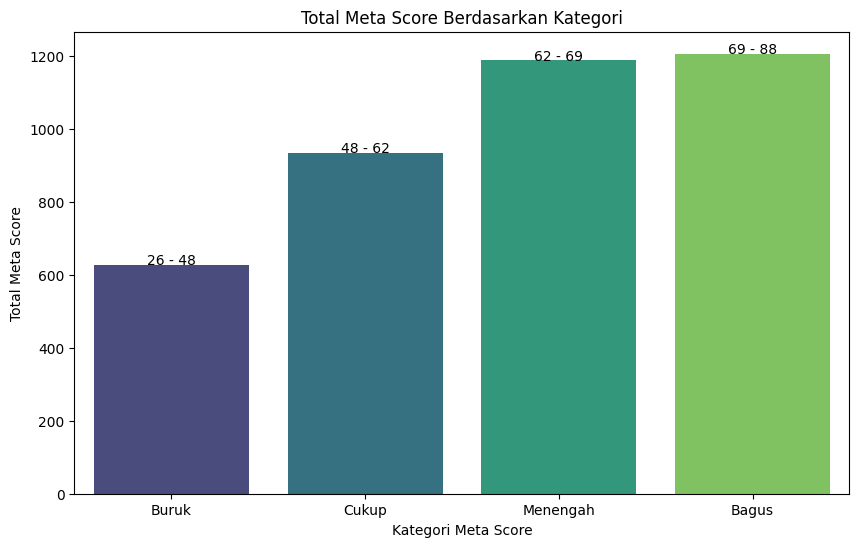

In [18]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=total_metaScore_by_category.index, y=total_metaScore_by_category.values, palette='viridis')
plt.title('Total Meta Score Berdasarkan Kategori')
plt.xlabel('Kategori Meta Score')
plt.ylabel('Total Meta Score')

# Menambahkan teks untuk menampilkan rentang nilai pada sumbu x
for i in range(len(bin_edges) - 1):
    plt.text(i, total_metaScore_by_category.values[i], f"{bin_edges[i]:,.0f} - {bin_edges[i+1]:,.0f}", ha='center')

plt.show()

In [ ]:
# Menampilkan statistik deskriptif untuk Meta Score berdasarkan kategori Tomatometer
meta_score_descriptive = data.groupby('Tomatometer Category')['Meta Score'].describe()
print(meta_score_descriptive)

                      count       mean       std   min   25%   50%   75%   max
Tomatometer Category                                                          
Buruk                  17.0  36.941176  6.209575  26.0  34.0  35.0  42.0  48.0
Cukup                  17.0  55.411765  5.038090  47.0  52.0  54.0  59.0  66.0
Menengah               17.0  65.352941  2.935583  57.0  64.0  66.0  67.0  70.0
Bagus                  17.0  74.882353  5.060661  69.0  71.0  74.0  77.0  88.0


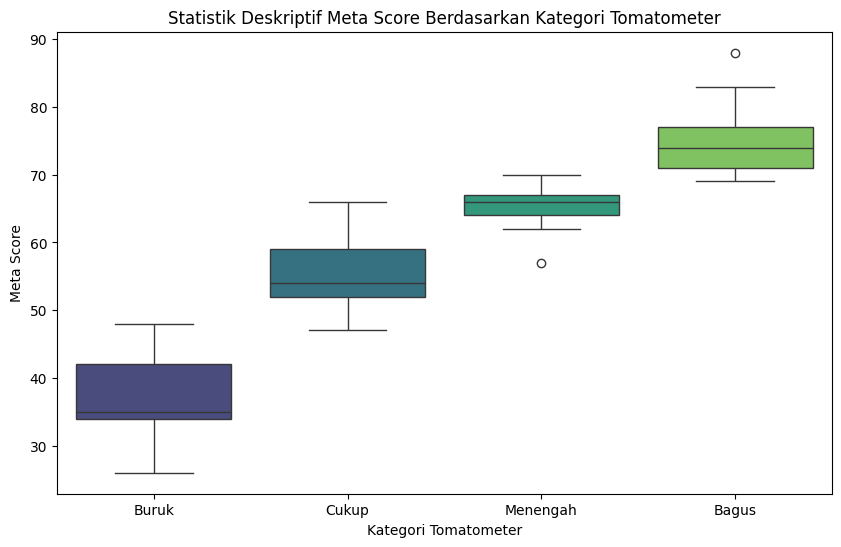

In [ ]:
# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tomatometer Category', y='Meta Score', data=data, palette='viridis')
plt.title('Statistik Deskriptif Meta Score Berdasarkan Kategori Tomatometer')
plt.xlabel('Kategori Tomatometer')
plt.ylabel('Meta Score')
plt.show()

#**PENGARUH TOMATOMETER TERHADAP METASCORE: Analisis Regresi dalam Kritik Film**

##**UJI REGRESI**

Menguji apakah variabel independen (Tomatometer) memiliki pengaruh yang signifikan terhadap variabel dependen (Meta Score). Uji regresi juga membantu kita memahami kekuatan dan arah hubungan antara variabel-variabel tersebut.

In [ ]:
# Membuat model regresi
regression_model_metaScore_tomatometer = ols('Q("Meta Score") ~ Q("Tomatometer")', data=data).fit()

###**Syarat-Syarat Untuk Melakukan Uji Regresi**

####**Uji Linearitas**

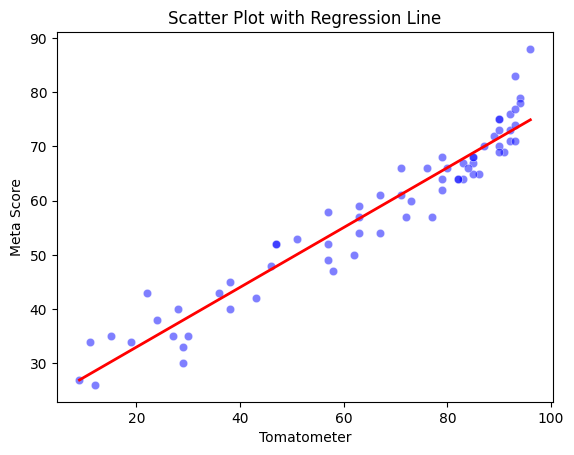

In [ ]:
# Scatter plot
sns.scatterplot(x=data['Tomatometer'], y=data['Meta Score'], color='blue', alpha=0.5)

# Garis regresi
x = np.linspace(min(data['Tomatometer']), max(data['Tomatometer']))
y = regression_model_metaScore_tomatometer.params[0] + regression_model_metaScore_tomatometer.params[1] * x
plt.plot(x, y, color='red', linestyle='-', linewidth=2)

# Label dan judul
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Tomatometer')
plt.ylabel('Meta Score')

# Menampilkan plot
plt.show()

####**Uji Normalitas**

Fungsi dari uji normalitas untuk menentukan sejauh mana data yang kita miliki cocok dengan asumsi distribusi normal

Dalam konteks uji normalitas, jika nilai p-value lebih besar dari tingkat signifikansi yang dipilih (α) atau 0.005, maka akan dianggap sebagai menerima hipotesis nol yang menyatakan bahwa sampel data berasal dari distribusi normal.

In [ ]:
# 2. Uji Normalitas Residual (Shapiro-Wilk Test)
residuals_regression_model_metaScore_tomatometer = regression_model_metaScore_tomatometer.resid
shapiro_test_residuals_regression_model_metaScore_tomatometer = stats.shapiro(residuals_regression_model_metaScore_tomatometer)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test_residuals_regression_model_metaScore_tomatometer.statistic}, p-value={shapiro_test_residuals_regression_model_metaScore_tomatometer.pvalue}")

Shapiro-Wilk Test: Statistic=0.9735226035118103, p-value=0.15640313923358917


#####**QQ Plot Untuk Melihat Normalitas**

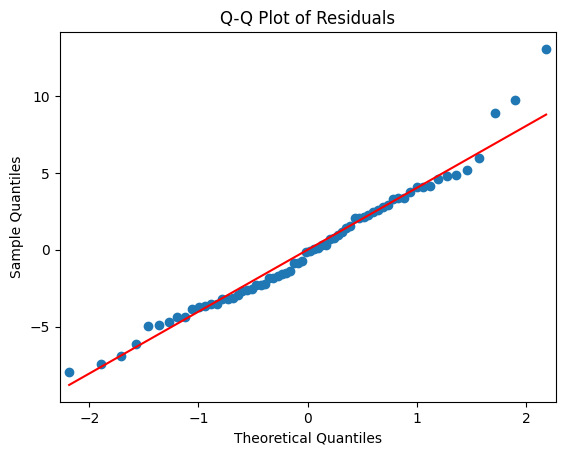

In [ ]:
# Q-Q Plot untuk melihat normalitas
sm.qqplot(residuals_regression_model_metaScore_tomatometer, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

**Shapiro-Wilk Test:**

-  **Statistic=0.9735226035118103**

  Statistik uji ini menunjukkan seberapa baik data sampel kita cocok dengan pola yang diharapkan dari distribusi normal. Semakin dekat nilai Statistik uji ini dengan 1, semakin baik data cocok dengan distribusi normal.

-  **p-value=0.15640313923358917**

  Kita gagal menolak hipotesis nol (H0) yang menyatakan bahwa data residual berasal dari distribusi normal. Dalam hal ini, p-value adalah 0.1564, yang lebih besar dari 0.05. Artinya, tidak ada bukti yang cukup untuk menyatakan bahwa residual tidak normal. Dengan kata lain, residual dapat dianggap berdistribusi normal.

####**Uji Homoskedastisitas (Uji Breusch-Pagan)**

Uji homoskedastisitas (atau uji heteroskedastisitas), adalah untuk memastikan bahwa asumsi yang diperlukan untuk keakuratan dan keberlakuan hasil analisis regresi terpenuhi. Salah satu asumsi penting dalam regresi linier adalah homoskedastisitas, yang mengasumsikan bahwa varians dari residual (kesalahan prediksi) adalah konstan sepanjang rentang nilai prediksi.

**(Uji Breusch-Pagan)** Uji ini mengevaluasi apakah varians dari residual dalam regresi bergantung pada variabel independen atau variabel-variabel lain dalam model regresi. Ini berguna untuk memverifikasi apakah ada pola heteroskedastisitas dalam residual, di mana varians residual bisa bervariasi tergantung pada nilai variabel independen.

Dalam konteks uji Breusch-Pagan, hipotesis nol menyatakan bahwa tidak ada heteroskedastisitas dalam residual model regresi.

In [ ]:
# 3. Uji Homoskedastisitas (Heteroskedastisitas)
# Uji Breusch-Pagan
bp_test_regression_model_metaScore_tomatometer = het_breuschpagan(residuals_regression_model_metaScore_tomatometer, regression_model_metaScore_tomatometer.model.exog)
print(f"Breusch-Pagan Test: Lagrange multiplier statistic={bp_test_regression_model_metaScore_tomatometer[0]}, p-value={bp_test_regression_model_metaScore_tomatometer[1]}")

Breusch-Pagan Test: Lagrange multiplier statistic=0.00014098370484916245, p-value=0.9905264158670959


**Breusch-Pagan Test:**

-  **Lagrange multiplier statistic=0.00014098370484916245**

  Statistik Lagrange Multiplier adalah ukuran dari keberagaman varians yang diamati dalam residual model regresi.
  Nilai yang lebih tinggi menunjukkan adanya indikasi heteroskedastisitas dalam model.
  Pada model didapatkan nilai yang sangat rendah menunjukkan bahwa variasi residual yang diamati dalam model regresi sangat kecil.


-  **p-value=0.9905264158670959**
  
  Nilai p yang sangat tinggi (dekat dengan 1) menunjukkan bahwa tidak ada bukti yang cukup untuk menolak hipotesis nol.
  Dengan kata lain, tidak ada bukti yang cukup untuk menyatakan bahwa ada heteroskedastisitas dalam model regresi.

####**Uji Durbin Watson**

Autokorelasi terjadi ketika terdapat pola keterkaitan antara nilai-nilai residual yang terdekat dalam deret waktu, yang mengindikasikan bahwa terdapat korelasi antara kesalahan prediksi pada waktu sebelumnya dengan kesalahan prediksi pada waktu berikutnya.

In [ ]:
# 4. Uji Tidak Ada Autokorelasi (Durbin-Watson Test)
dw_test_regression_model_metaScore_tomatometer = sm.stats.durbin_watson(residuals_regression_model_metaScore_tomatometer)
print(f"Durbin-Watson Test: Statistic={dw_test_regression_model_metaScore_tomatometer}")

Durbin-Watson Test: Statistic=1.646925098190311


###**Kesimpulan**

In [ ]:
# Kesimpulan apakah syarat-syarat terpenuhi
if shapiro_test_residuals_regression_model_metaScore_tomatometer.pvalue < 0.05:
    print("H0 ditolak, H1 diterima: Asumsi normalitas tidak terpenuhi.")
else:
    print("H0 diterima: Asumsi normalitas terpenuhi.")

if bp_test_regression_model_metaScore_tomatometer[1] < 0.05:
    print("H0 ditolak, H1 diterima: Asumsi homoskedastisitas tidak terpenuhi.")
else:
    print("H0 diterima: Asumsi homoskedastisitas terpenuhi.")

if 1.5 < dw_test_regression_model_metaScore_tomatometer < 2.5:
    print("Asumsi tidak ada autokorelasi terpenuhi.")
else:
    print("Asumsi tidak ada autokorelasi tidak terpenuhi.")

H0 diterima: Asumsi normalitas terpenuhi.
H0 diterima: Asumsi homoskedastisitas terpenuhi.
Asumsi tidak ada autokorelasi terpenuhi.


Dengan demikian, kita dapat melanjutkan dengan analisis Regresi dengan keyakinan karena bahwa asumsi syarat-syarat penting untuk melakukan uji regresi telah terpenuhi dalam data kita.

In [ ]:
print(regression_model_metaScore_tomatometer.summary())

                            OLS Regression Results                            
Dep. Variable:        Q("Meta Score")   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     828.9
Date:                Tue, 28 May 2024   Prob (F-statistic):           4.39e-39
Time:                        03:58:53   Log-Likelihood:                -191.29
No. Observations:                  68   AIC:                             386.6
Df Residuals:                      66   BIC:                             391.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.9468      1.352  

- **R-squared:                       0.926**

  Dalam konteks model regresi kita, R-squared memiliki nilai sebesar 0.926. Ini menunjukkan bahwa sekitar 92.6% variabilitas dalam variabel dependen ("Meta Score") dapat dijelaskan oleh variabel independen ("Tomatometer") dalam model regresi kita. Dengan demikian, model regresi kita cukup baik dalam menjelaskan data, karena sebagian besar variasi dalam variabel dependen dapat dijelaskan oleh variabel independen yang kita gunakan.

- **F-statistic:                     828.9**
  
  Nilai F-statistic adalah angka yang menunjukkan seberapa besar variabilitas antara kelompok (variabilitas yang dijelaskan oleh model) dibandingkan dengan variabilitas dalam kelompok (variabilitas yang tidak dijelaskan oleh model). Semakin besar nilai F-statistic, semakin besar perbedaan antara kelompok yang dijelaskan oleh model dan kelompok yang tidak dijelaskan oleh model.

- **Prob (F-statistic):           4.39e-39**
  
  Ini adalah nilai p-value yang terkait dengan F-statistic. P-value ini digunakan untuk menentukan signifikansi statistik dari F-statistic. Nilai p-value yang kecil menunjukkan bahwa ada cukup bukti untuk menolak hipotesis nol (hipotesis nol: tidak ada variabel independen yang signifikan), yang berarti model regresi secara keseluruhan signifikan.

In [ ]:
# Prediksi nilai menggunakan model
predictions = regression_model_metaScore_tomatometer.predict(data["Tomatometer"])

# Menghitung residual
residuals = data["Meta Score"] - predictions

# Menghitung RMSE
rmse = np.sqrt(np.mean(residuals**2))

# Menampilkan RMSE
print(f"RMSE: {rmse}")

RMSE: 4.031616390729968


**RMSE**


RMSE (Root Mean Squared Error) memberikan ukuran dalam satuan yang sama dengan variabel dependen (Meta Score) tentang seberapa jauh, secara rata-rata, nilai prediksi dari nilai aktual.


**Interpretasi RMSE:**


-  **Skala Kesalahan:** RMSE memberikan ukuran seberapa jauh prediksi model dari
  nilai aktual dalam satuan yang sama dengan variabel target. Dalam kasus ini, "Meta Score" diukur dalam skala 0-100, maka rata-rata kesalahan prediksi model adalah sekitar 4.03 poin pada skala ini.
-  **4.03 poin:** Rata-rata kesalahan prediksi Meta Score dari model regresi
  ketika menggunakan Tomatometer sebagai prediktor.



In [ ]:
# Fungsi untuk memprediksi Meta Score berdasarkan Tomatometer
def predict_meta_score(tomatometer_value):
    # Prediksi menggunakan model regresi
    prediction = regression_model_metaScore_tomatometer.predict(pd.DataFrame({"Tomatometer": [tomatometer_value]}))
    return prediction.iloc[0]

# Contoh penggunaan fungsi prediksi
tomatometer_value = 28
predicted_meta_score = predict_meta_score(tomatometer_value)
print(f"Predicted Meta Score untuk Tomatometer {tomatometer_value}: {predicted_meta_score}")

Predicted Meta Score untuk Tomatometer 28: 37.39746058310267


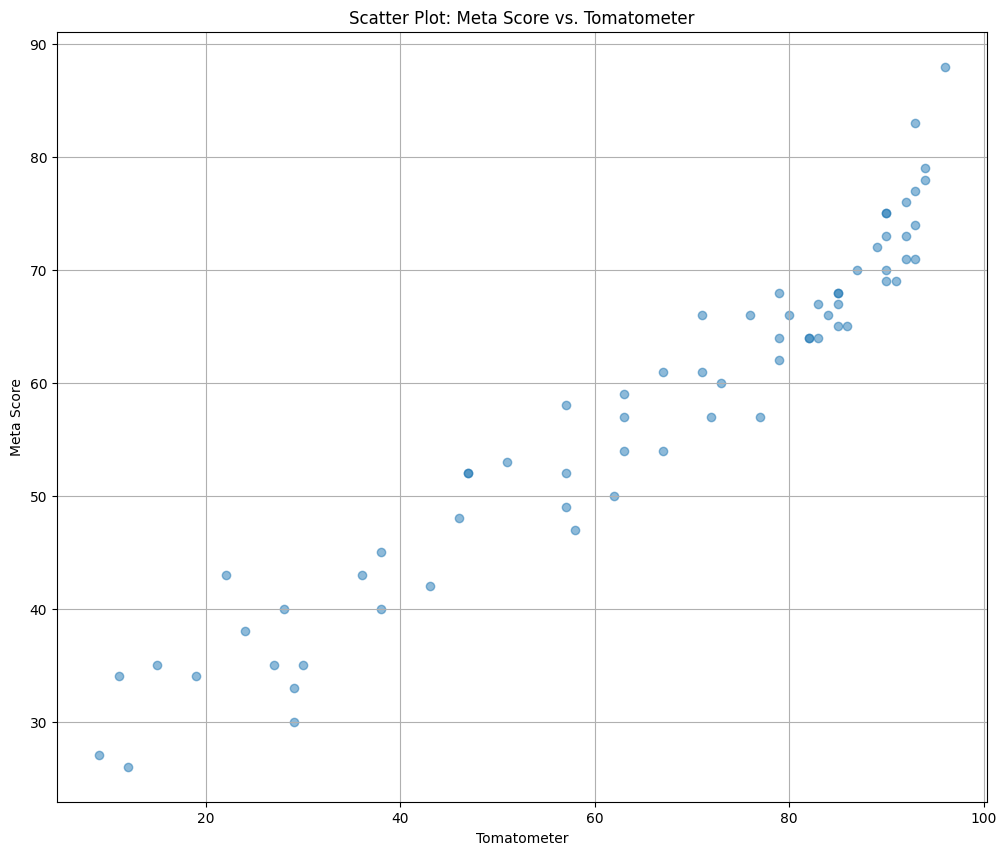

In [ ]:
# Plot scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(data['Tomatometer'], data['Meta Score'], alpha=0.5)
plt.title('Scatter Plot: Meta Score vs. Tomatometer')
plt.xlabel('Tomatometer')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()